In [ ]:
import numpy as np
import scipy as sp
from scipy.linalg import eig
from scipy.linalg import eigh
import matplotlib.pyplot as plt
from numpy.random import uniform as uni

def me(x_0):
  return 0.063+0.083*x_0

def TMM(xs_1,Zs_1,Us_1,E_1):
  ks_1 = np.zeros(len(Us_1))
  ms_1 = me(xs_1)
  ks_1 = np.emath.sqrt(2*ms_1*(E_1-Us_1))
  d_1 = len(Us_1)-1
  Ms_1 = np.zeros((2,2),dtype='complex')
  M_1 = np.zeros((2,2),dtype='complex')
  M_1[0,0] = 1
  M_1[1,1] = 1

  for i_1 in range(d_1):
    if (ks_1[i_1]*ms_1[i_1+1])!=0:
      Ms_1[0,0] = 0.5*(1+(ks_1[i_1+1]*ms_1[i_1])/(ks_1[i_1]*ms_1[i_1+1]))*np.exp((0+1j)*(ks_1[i_1+1]-ks_1[i_1])*Zs_1[i_1])
      Ms_1[0,1] = 0.5*(1-(ks_1[i_1+1]*ms_1[i_1])/(ks_1[i_1]*ms_1[i_1+1]))*np.exp((0-1j)*(ks_1[i_1+1]+ks_1[i_1])*Zs_1[i_1])
      Ms_1[1,0] = 0.5*(1-(ks_1[i_1+1]*ms_1[i_1])/(ks_1[i_1]*ms_1[i_1+1]))*np.exp((0+1j)*(ks_1[i_1+1]+ks_1[i_1])*Zs_1[i_1])
      Ms_1[1,1] = 0.5*(1+(ks_1[i_1+1]*ms_1[i_1])/(ks_1[i_1]*ms_1[i_1+1]))*np.exp((0-1j)*(ks_1[i_1+1]-ks_1[i_1])*Zs_1[i_1])
      M_1 = M_1 @ Ms_1

  T_1 = (ks_1[d_1]*ms_1[0])/(ks_1[0]*ms_1[d_1])/(np.abs(M_1[0,0])**2)
  R_1 = (np.abs(M_1[1,0])**2)/(np.abs(M_1[0,0])**2)

  return T_1,R_1

def f(v_2,u_2,Vg_2):
  eps_2 = 13.6
  d_2 =3/0.052918
  return Vg_2/(2*np.pi*eps_2)*np.arctan((u_2*v_2)/(d_2*np.sqrt(d_2**2 + u_2**2 + v_2**2)))

def V(y3,x3,Vg_3):
  t3 = 70/0.052918
  b3 = 30/0.052918
  l3l = 0
  r3l = 10/0.052918
  l3r = 40/0.052918
  r3r = 50/0.052918
  return (f(x3-l3l,y3-b3,Vg_3)+f(x3-l3l,t3-y3,Vg_3)+f(r3l-x3,y3-b3,Vg_3)+f(r3l-x3,t3-y3,Vg_3))+(f(x3-l3r,y3-b3,Vg_3)+f(x3-l3r,t3-y3,Vg_3)+f(r3r-x3,y3-b3,Vg_3)+f(r3r-x3,t3-y3,Vg_3))

def H_make(V2,alpha2):
  out2 = np.zeros((len(V2),len(V2)))
  for i2 in range(len(V2)):
    for j2 in range(len(V2)):
      if np.abs(i2-j2) ==1:
        out2[i2,j2] = -alpha2
      elif i2==j2:
        out2[i2,j2] = 2*alpha2 + V2[i2]
  return out2

def eigen(H3,N3):
  vals = eigh(H3,subset_by_index= [0,N3-1],eigvals_only = True)
  return vals


<ipython-input-1-7dc0c97ae460>:22: RuntimeWarning: invalid value encountered in cdouble_scalars
  Ms_1[0,0] = 0.5*(1+(ks_1[i_1+1]*ms_1[i_1])/(ks_1[i_1]*ms_1[i_1+1]))*np.exp((0+1j)*(ks_1[i_1+1]-ks_1[i_1])*Zs_1[i_1])
<ipython-input-1-7dc0c97ae460>:23: RuntimeWarning: invalid value encountered in cdouble_scalars
  Ms_1[0,1] = 0.5*(1-(ks_1[i_1+1]*ms_1[i_1])/(ks_1[i_1]*ms_1[i_1+1]))*np.exp((0-1j)*(ks_1[i_1+1]+ks_1[i_1])*Zs_1[i_1])
<ipython-input-1-7dc0c97ae460>:24: RuntimeWarning: invalid value encountered in cdouble_scalars
  Ms_1[1,0] = 0.5*(1-(ks_1[i_1+1]*ms_1[i_1])/(ks_1[i_1]*ms_1[i_1+1]))*np.exp((0+1j)*(ks_1[i_1+1]+ks_1[i_1])*Zs_1[i_1])
<ipython-input-1-7dc0c97ae460>:25: RuntimeWarning: invalid value encountered in cdouble_scalars
  Ms_1[1,1] = 0.5*(1+(ks_1[i_1+1]*ms_1[i_1])/(ks_1[i_1]*ms_1[i_1+1]))*np.exp((0-1j)*(ks_1[i_1+1]-ks_1[i_1])*Zs_1[i_1])
<ipython-input-1-7dc0c97ae460>:22: RuntimeWarning: divide by zero encountered in cdouble_scalars
  Ms_1[0,0] = 0.5*(1+(ks_1[i_1+1]*ms_1[i_1]

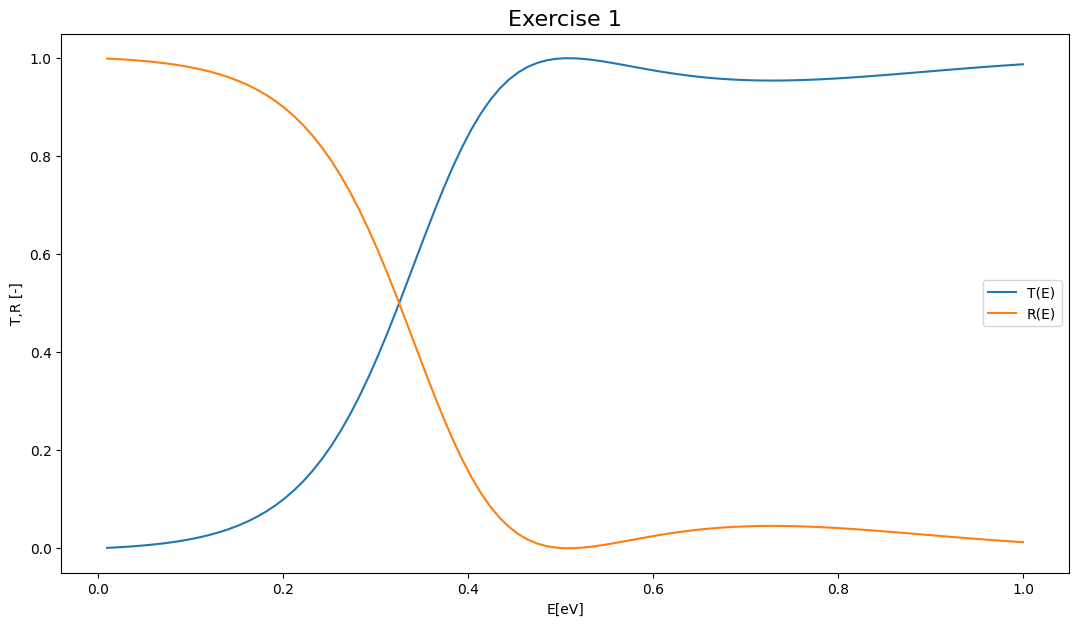

In [ ]:
Eh=27.211
npoints = 100
Es = np.linspace(0,1/Eh,npoints)
d=5/0.052918
U = 0.27/Eh
x1=0
nz = 100
Zs = np.linspace(0,3*d,nz)

xs = np.zeros(nz-1)
Us = np.zeros(nz-1)
for i in range(len(xs)):
  if (Zs[i]+Zs[i+1])/2 >=d and (Zs[i]+Zs[i+1])/2 <=2*d:
    xs[i] = x1
    Us[i] = U
out = np.zeros((2,npoints))
for E in Es:
  out[0,np.where(Es==E)[0][0]], out[1,np.where(Es==E)[0][0]] = TMM(xs,Zs,Us,E)

Es *=Eh


fig = plt.figure(figsize=(13,7))  #konfiguracja wykresu
ax = fig.add_subplot(111)
ax.set_ylabel('T,R [-]')
ax.set_xlabel(r'E[eV]')
ax.set_title(r'Exercise 1', fontsize = 16)
plt.plot(Es,out[0,:],label = r'T(E)')
plt.plot(Es,out[1,:],label = r'R(E)')
plt.legend()

plt.show()

<ipython-input-1-7dc0c97ae460>:22: RuntimeWarning: invalid value encountered in cdouble_scalars
  Ms_1[0,0] = 0.5*(1+(ks_1[i_1+1]*ms_1[i_1])/(ks_1[i_1]*ms_1[i_1+1]))*np.exp((0+1j)*(ks_1[i_1+1]-ks_1[i_1])*Zs_1[i_1])
<ipython-input-1-7dc0c97ae460>:23: RuntimeWarning: invalid value encountered in cdouble_scalars
  Ms_1[0,1] = 0.5*(1-(ks_1[i_1+1]*ms_1[i_1])/(ks_1[i_1]*ms_1[i_1+1]))*np.exp((0-1j)*(ks_1[i_1+1]+ks_1[i_1])*Zs_1[i_1])
<ipython-input-1-7dc0c97ae460>:24: RuntimeWarning: invalid value encountered in cdouble_scalars
  Ms_1[1,0] = 0.5*(1-(ks_1[i_1+1]*ms_1[i_1])/(ks_1[i_1]*ms_1[i_1+1]))*np.exp((0+1j)*(ks_1[i_1+1]+ks_1[i_1])*Zs_1[i_1])
<ipython-input-1-7dc0c97ae460>:25: RuntimeWarning: invalid value encountered in cdouble_scalars
  Ms_1[1,1] = 0.5*(1+(ks_1[i_1+1]*ms_1[i_1])/(ks_1[i_1]*ms_1[i_1+1]))*np.exp((0-1j)*(ks_1[i_1+1]-ks_1[i_1])*Zs_1[i_1])
<ipython-input-1-7dc0c97ae460>:22: RuntimeWarning: divide by zero encountered in cdouble_scalars
  Ms_1[0,0] = 0.5*(1+(ks_1[i_1+1]*ms_1[i_1]

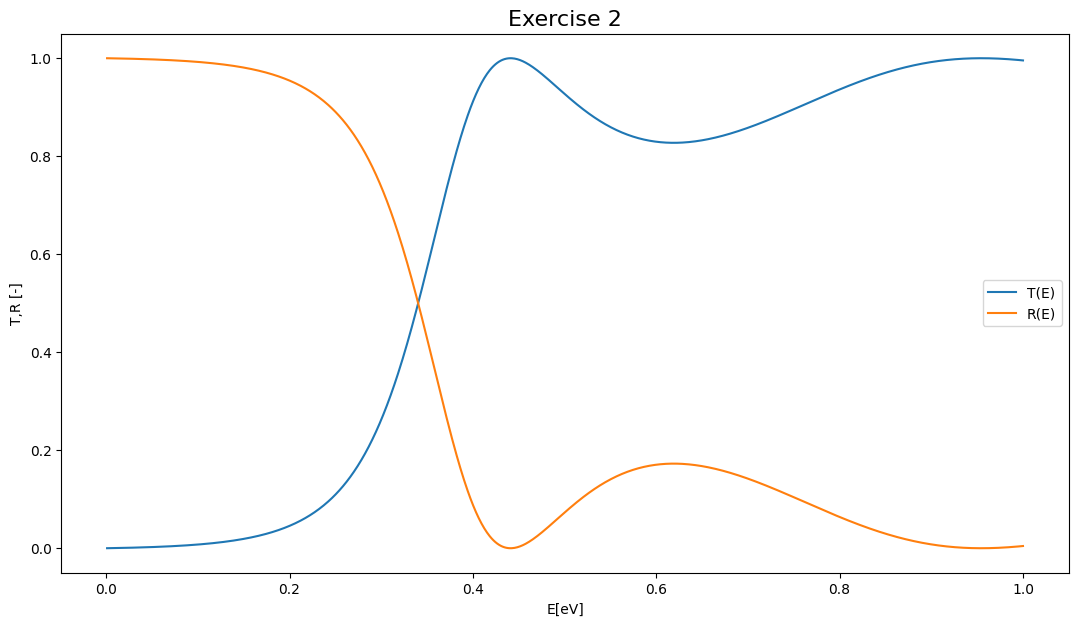

In [ ]:
Eh=27.211
npoints = 1000
Es = np.linspace(0,1/Eh,npoints)
d=5/0.052918
U = 0.27/Eh
x1=0.3
nz = 100
Zs = np.linspace(0,3*d,nz)
xs = np.zeros(nz-1)
Us = np.zeros(nz-1)
for i in range(len(xs)):
  if (Zs[i]+Zs[i+1])/2 >=d and (Zs[i]+Zs[i+1])/2 <=2*d:
    xs[i] = x1
    Us[i] = U
out = np.zeros((2,npoints))
for E in Es:
  out[0,np.where(Es==E)[0][0]], out[1,np.where(Es==E)[0][0]] = TMM(xs,Zs,Us,E)

Es *=Eh



fig = plt.figure(figsize=(13,7))  #konfiguracja wykresu
ax = fig.add_subplot(111)
ax.set_ylabel('T,R [-]')
ax.set_xlabel(r'E[eV]')
ax.set_title(r'Exercise 2', fontsize = 16)
plt.plot(Es,out[0,:],label = r'T(E)')
plt.plot(Es,out[1,:],label = r'R(E)')
plt.legend()

plt.show()

<ipython-input-1-7dc0c97ae460>:22: RuntimeWarning: invalid value encountered in cdouble_scalars
  Ms_1[0,0] = 0.5*(1+(ks_1[i_1+1]*ms_1[i_1])/(ks_1[i_1]*ms_1[i_1+1]))*np.exp((0+1j)*(ks_1[i_1+1]-ks_1[i_1])*Zs_1[i_1])
<ipython-input-1-7dc0c97ae460>:23: RuntimeWarning: invalid value encountered in cdouble_scalars
  Ms_1[0,1] = 0.5*(1-(ks_1[i_1+1]*ms_1[i_1])/(ks_1[i_1]*ms_1[i_1+1]))*np.exp((0-1j)*(ks_1[i_1+1]+ks_1[i_1])*Zs_1[i_1])
<ipython-input-1-7dc0c97ae460>:24: RuntimeWarning: invalid value encountered in cdouble_scalars
  Ms_1[1,0] = 0.5*(1-(ks_1[i_1+1]*ms_1[i_1])/(ks_1[i_1]*ms_1[i_1+1]))*np.exp((0+1j)*(ks_1[i_1+1]+ks_1[i_1])*Zs_1[i_1])
<ipython-input-1-7dc0c97ae460>:25: RuntimeWarning: invalid value encountered in cdouble_scalars
  Ms_1[1,1] = 0.5*(1+(ks_1[i_1+1]*ms_1[i_1])/(ks_1[i_1]*ms_1[i_1+1]))*np.exp((0-1j)*(ks_1[i_1+1]-ks_1[i_1])*Zs_1[i_1])
<ipython-input-1-7dc0c97ae460>:22: RuntimeWarning: divide by zero encountered in cdouble_scalars
  Ms_1[0,0] = 0.5*(1+(ks_1[i_1+1]*ms_1[i_1]

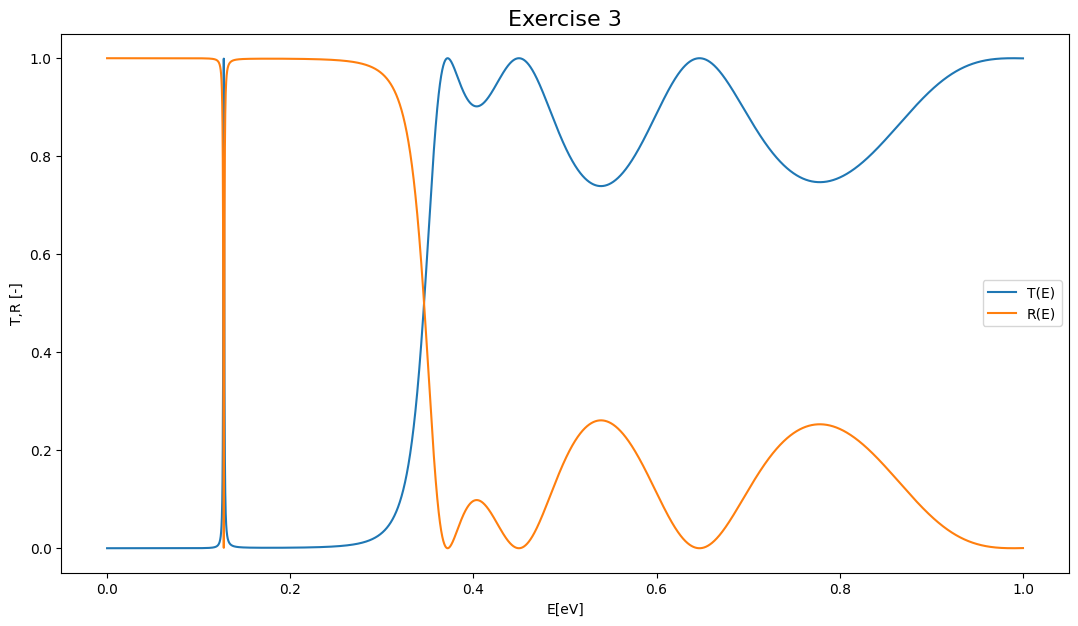

In [ ]:
Eh=27.211
npoints = 10000
Es = np.linspace(0,1/Eh,npoints)
d=1/0.052918
U = 0.27/Eh
x1=0.3
nz = 100
Zs = np.linspace(0,21*d,nz)
xs = np.zeros(nz-1)
Us = np.zeros(nz-1)
for i in range(len(xs)):
  if ((Zs[i]+Zs[i+1])/2 >=4*d and (Zs[i]+Zs[i+1])/2 <=9*d) or ((Zs[i]+Zs[i+1])/2 >=12*d and (Zs[i]+Zs[i+1])/2 <=17*d):
    xs[i] = x1
    Us[i] = U
out = np.zeros((2,npoints))
for E in Es:
  out[0,np.where(Es==E)[0][0]], out[1,np.where(Es==E)[0][0]] = TMM(xs,Zs,Us,E)

Es *=Eh



fig = plt.figure(figsize=(13,7))  #konfiguracja wykresu
ax = fig.add_subplot(111)
ax.set_ylabel('T,R [-]')
ax.set_xlabel(r'E[eV]')
ax.set_title(r'Exercise 3', fontsize = 16)
plt.plot(Es,out[0,:],label = r'T(E)')
plt.plot(Es,out[1,:],label = r'R(E)')
plt.legend()

plt.show()

In [ ]:

#T=1
Eh=27.211
npoints = 101
mu_s = 0.087/Eh
mu_d = mu_s
Es = np.linspace(0.0000000001,mu_s,npoints)
d=1/0.052918
U = 0.27/Eh
x1=0.3
nz = 100
Zs = np.linspace(0,21*d,nz)
xs = np.zeros(nz-1)
Us = np.zeros(nz-1)
kB = 3.167e-6
m=0.063
nv = 26
Vs = np.linspace(0,0.5/Eh,nv)
Ts = np.zeros((nv,npoints))

js = np.zeros(nv)
dE = mu_s/(npoints-1)

for i in range(len(xs)):
  if ((Zs[i]+Zs[i+1])/2 >=4*d and (Zs[i]+Zs[i+1])/2 <=9*d) or ((Zs[i]+Zs[i+1])/2 >=12*d and (Zs[i]+Zs[i+1])/2 <=17*d):
    Us[i] = U
for k in range(nv):
  vbias = np.linspace(0,-Vs[k],nz-1)
  Up = Us+vbias

  for E in Es:
    Ts[k,np.where(Es==E)[0][0]], r = TMM(xs,Zs,Up,E)



#całki

for ic in range(nv):
  for jc in range(npoints):
    js[ic] +=Ts[ic,jc]*np.log((1+np.exp((mu_s-Es[jc])/kB))/(1+np.exp((mu_d-Vs[ic]-Es[jc])/kB)))


js*=m*kB/(2*np.pi)









Vs *=Eh



fig = plt.figure(figsize=(13,7))  #konfiguracja wykresu
ax = fig.add_subplot(111)
ax.set_ylabel('j[a.u]')
ax.set_xlabel(r'V[eV]')
ax.set_title(r'Current-voltage characteristic of the RTD diode', fontsize = 16)
plt.plot(Vs,js)



plt.show()

<ipython-input-14-ad405397648a>:31: ComplexWarning: Casting complex values to real discards the imaginary part
  Ts[k,np.where(Es==E)[0][0]], r = TMM(xs,Zs,Up,E)


KeyboardInterrupt: ignored

In [ ]:
kB

3.167e-06

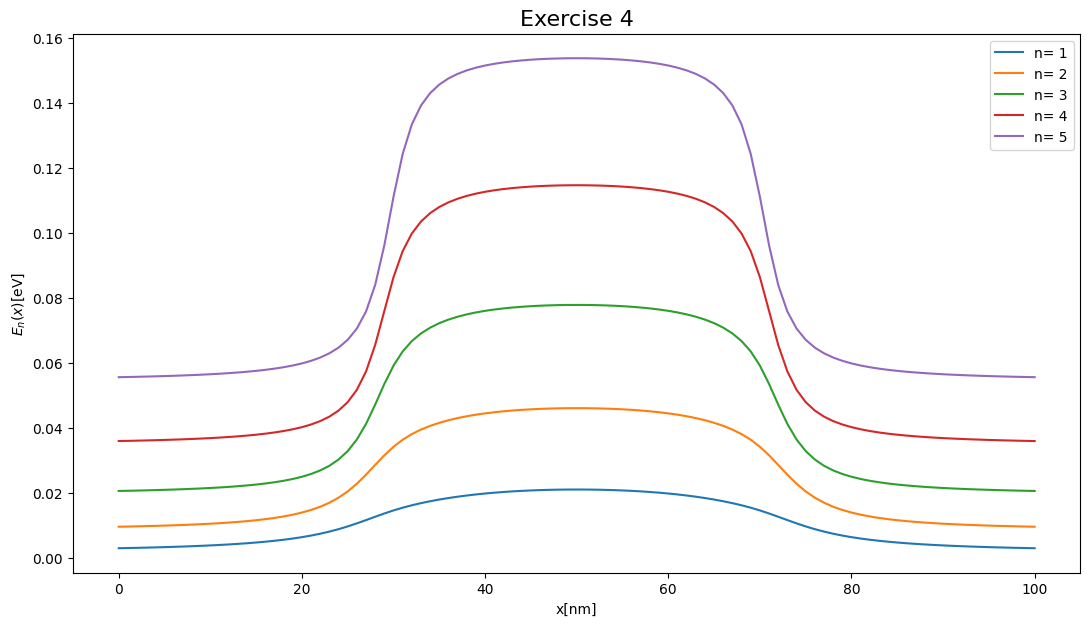

In [ ]:
nx = 101
Xs = np.linspace(0,100/0.052918,nx)
ny = 51
Ys = np.linspace(0,50/0.052918,ny)
dy = Ys[1]-Ys[0]
grid =np.zeros((nx,ny))
Vg = 4/27.211
for i in range(nx):
  for j in range(ny):
    grid[i,j] = V(Xs[i],Ys[j],Vg)

m = 0.063
alpha=1/(2*m*dy**2)
nstates =5
eigenvals = np.zeros((nx,nstates))
for i in range(nx):
  eigenvals[i,:] = eigen(H_make(grid[i,:],alpha),nstates)



fig = plt.figure(figsize=(13,7))  #konfiguracja wykresu
ax = fig.add_subplot(111)
ax.set_ylabel(r'$E_n(x)$[eV]')
ax.set_xlabel(r'x[nm]')
ax.set_title(r'Exercise 4', fontsize = 16)
for i in range(nstates):
    plt.plot(Xs*0.052918,eigenvals[:,i]*Eh,label = f'n= {i+1}')
plt.legend()

plt.show()

<ipython-input-18-302b5e74dc54>:13: ComplexWarning: Casting complex values to real discards the imaginary part
  Ts[k,i],Rp = TMM(np.zeros(nx),Xs,Us,Es[i])


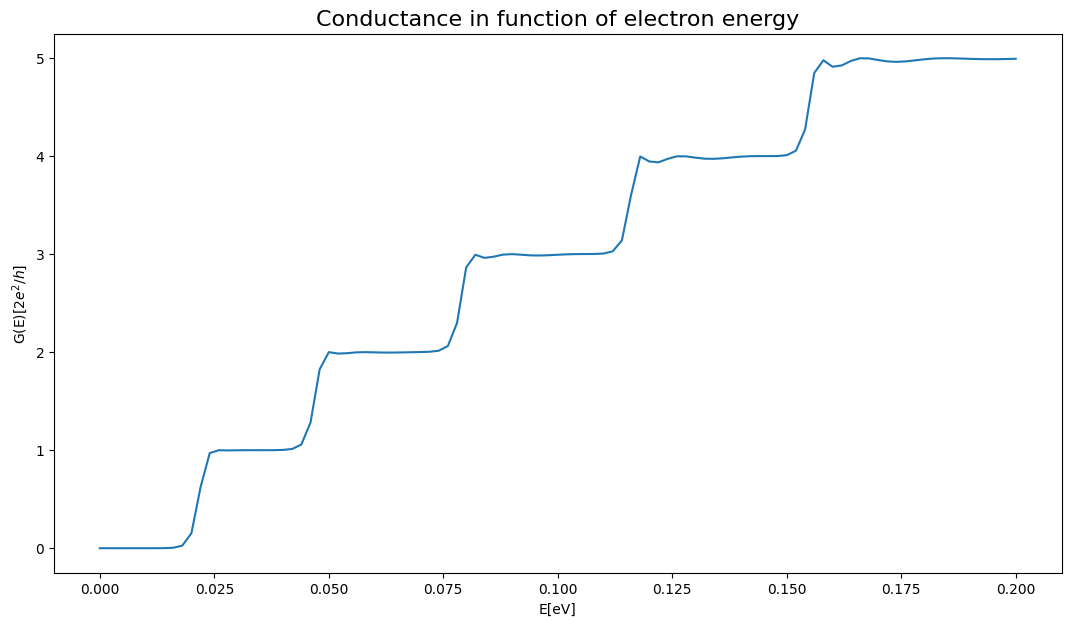

In [ ]:
nE = 101
Es = np.linspace(0,0.2/Eh,nE)
Ts = np.zeros((nstates,nE))

Xs = np.linspace(0,100/0.052918,nx)
Gs = np.zeros(nE)
Eh=27.211


for k in range(nstates):
  Us = eigenvals[:,k]
  for i in range(nE):
    Ts[k,i],Rp = TMM(np.zeros(nx),Xs,Us,Es[i])

Gs = sum(Ts)
Xs = Xs[1:nx-1]
Es *=Eh

fig = plt.figure(figsize=(13,7))  #konfiguracja wykresu
ax = fig.add_subplot(111)
ax.set_ylabel('G(E)[$2e^2/h$]')
ax.set_xlabel(r'E[eV]')
ax.set_title(r'Conductance in function of electron energy', fontsize = 16)
plt.plot(Es,Gs)


plt.show()

<ipython-input-20-ea963227b754>:36: ComplexWarning: Casting complex values to real discards the imaginary part
  Ts[0,k,i],Rp = TMM(np.zeros(nx),Xs,Us,Es[0])
<ipython-input-20-ea963227b754>:37: ComplexWarning: Casting complex values to real discards the imaginary part
  Ts[1,k,i],Rp = TMM(np.zeros(nx),Xs,Us,Es[1])


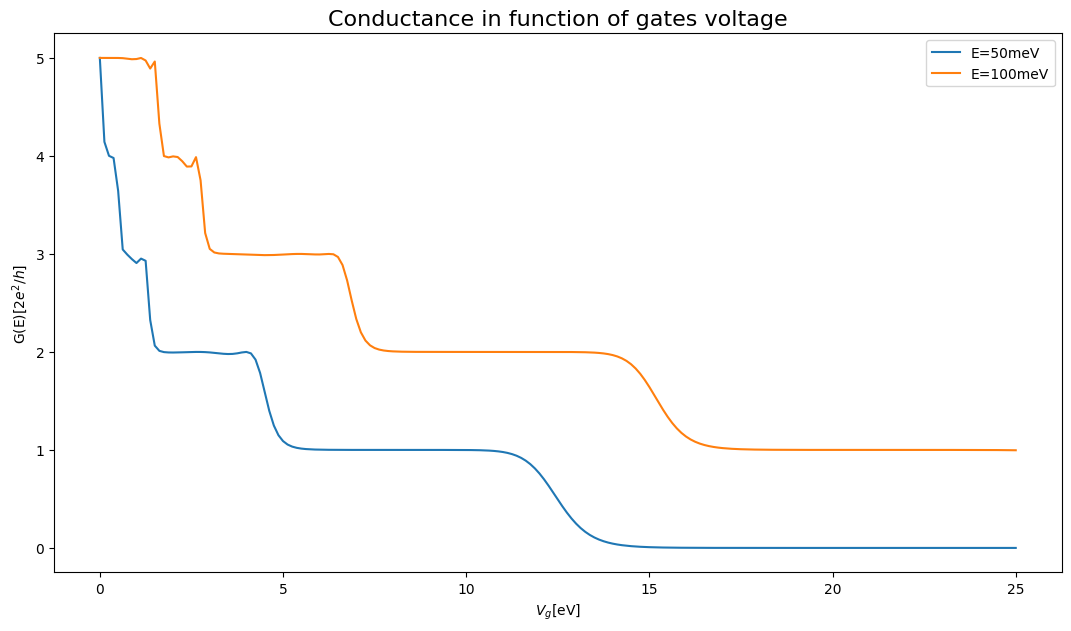

In [ ]:
Eh=27.211
nv = 201
Vs = np.linspace(0,25/Eh,nv)
nx = 101
Xs = np.linspace(0,100/0.052918,nx)
ny = 51
Ys = np.linspace(0,50/0.052918,ny)
dy = Ys[1]-Ys[0]
m = 0.063
alpha=1/(2*m*dy**2)
Es = np.array([0.05/Eh,0.1/Eh])
nstates =5

grid =np.zeros((nx,ny))
Ts = np.zeros((2,nstates,nv))
Gs = np.zeros((2,nv))





for i in range(nv):

  for iv in range(nx):
    for jv in range(ny):
      grid[iv,jv] = V(Xs[iv],Ys[jv],Vs[i])

  eigenvals = np.zeros((nx,nstates))
  for ix in range(nx):
    eigenvals[ix,:] = eigen(H_make(grid[ix,:],alpha),nstates)



  for k in range(nstates):
    Us = eigenvals[:,k]
    Ts[0,k,i],Rp = TMM(np.zeros(nx),Xs,Us,Es[0])
    Ts[1,k,i],Rp = TMM(np.zeros(nx),Xs,Us,Es[1])


for i in range(nstates):
  Gs[0,:] = sum(Ts[0,:,:])
  Gs[1,:] = sum(Ts[1,:,:])
Es *=Eh


fig = plt.figure(figsize=(13,7))  #konfiguracja wykresu
ax = fig.add_subplot(111)
ax.set_ylabel('G(E)[$2e^2/h$]')
ax.set_xlabel(r'$V_g$[eV]')
ax.set_title(r'Conductance in function of gates voltage', fontsize = 16)
plt.plot(Vs*Eh,Gs[0],label = 'E=50meV')
plt.plot(Vs*Eh,Gs[1],label = 'E=100meV')

plt.legend()

plt.show()